<a href="https://colab.research.google.com/github/OmarJFR/CNN/blob/main/VGG16_Grayscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras import datasets,models,layers
import seaborn as sn
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
# Normalization
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
CNN=models.Sequential([

    # Block 1
    layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1, 1),padding='same',input_shape=(28,28,1),activation='relu'),
    layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.MaxPooling2D((2,2), strides=(2, 2)),

    # Block 2
    layers.Conv2D(filters=128,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.Conv2D(filters=128,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.MaxPooling2D((2,2), strides=(2, 2)),

    # Block 3
    layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.MaxPooling2D((2,2), strides=(2, 2)),

    # Block 4
    layers.Conv2D(filters=512,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.Conv2D(filters=512,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.Conv2D(filters=512,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.MaxPooling2D((2,2), strides=(2, 2)),

    # Block 5
    layers.Conv2D(filters=512,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.Conv2D(filters=512,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.Conv2D(filters=512,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    #layers.MaxPooling2D((2,2), strides=(2, 2)),

    # Flatten and FC layers
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                   

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=1e-4)
CNN.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
            )

In [ ]:
CNN.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 78s 32ms/step - loss: 0.4129 - accuracy: 0.8557
Epoch 2/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0756 - accuracy: 0.9811
Epoch 3/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0517 - accuracy: 0.9874
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0414 - accuracy: 0.9900
Epoch 5/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0336 - accuracy: 0.9924
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0306 - accuracy: 0.9928
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0249 - accuracy: 0.9945
Epoch 8/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0239 - accuracy: 0.9951
Epoch 9/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0232 - accuracy: 0.9948
Epoch 10/10
1875/1875 [==============================] - 60s 32m

In [ ]:
CNN.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0365 - accuracy: 0.9921


[0.03654045611619949, 0.9921000003814697]

313/313 [==============================] - 2s 7ms/step


Text(95.72222222222221, 0.5, 'Truth')

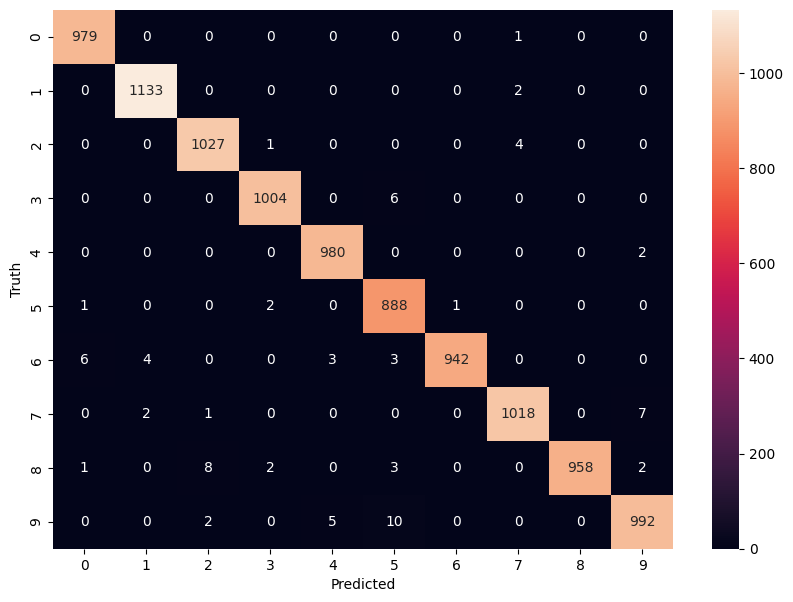

In [ ]:
y_pred = CNN.predict(X_test)
y_pred_labels=[np.argmax(element) for element in y_pred]#returns the index of the highest probability.
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')